In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [26]:
housing = fetch_california_housing()
import pandas as pd  # type: ignore
X = pd.DataFrame(housing.data, columns=housing.feature_names)
print(X.head())
y = housing.target
Y=pd.DataFrame(y,columns=['target'])
print(Y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   target
0   4.526
1   3.585
2   3.521
3   3.413
4   3.422


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1)
MLP = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1))
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_val)
rmse = mean_squared_error(y_val, y_pred)

# MLP regressor doesn't have a activation function for output layer, so we can't use it for classification

In [28]:
print(rmse)

0.27504413873229566


In [29]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist

In [30]:
tf.random.set_seed(1)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# we can manually set the optimizer, loss and metrics
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) which is the default value of learning rate
# loss = tf.keras.losses.SparseCategoricalCrossentropy()
# metrics = tf.keras.metrics.SparseCategoricalAccuracy()
# model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.9750 - accuracy: 0.6606 - val_loss: 0.9159 - val_accuracy: 0.6711
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7422 - accuracy: 0.7115 - val_loss: 0.6828 - val_accuracy: 0.7176
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6172 - accuracy: 0.7516 - val_loss: 0.6284 - val_accuracy: 0.7629
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5888 - accuracy: 0.7695 - val_loss: 0.5703 - val_accuracy: 0.7768
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5599 - accuracy: 0.7826 - val_loss: 0.5653 - val_accuracy: 0.7867
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5470 - accuracy: 0.7889 - val_loss: 0.5999 - val_accuracy: 0.7814
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5273 - accuracy: 0.8026 - val_loss: 0.7039 - val_accuracy:

In [33]:
model.layers[1].get_weights()


[array([[ 0.00863767,  0.0575783 , -0.07552539, ...,  0.01192359,
          0.08208731,  0.05723625],
        [ 0.0594772 ,  0.05610818, -0.04099138, ...,  0.00169024,
          0.00478606, -0.06749012],
        [ 0.02143829,  0.08745535, -0.06589129, ...,  0.04819555,
         -0.00438186,  0.00141259],
        ...,
        [ 0.01549622, -0.06085027, -0.07030976, ..., -0.02971169,
         -0.02896161,  0.0241556 ],
        [-0.06235397,  0.03697084, -0.04091032, ...,  0.01848583,
         -0.06556907,  0.04014236],
        [ 0.0235613 ,  0.0673118 , -0.0489563 , ..., -0.07716613,
          0.10083144, -0.07903408]], dtype=float32),
 array([-2.46453322e-02, -2.31681727e-02, -3.07265241e-02,  2.17588037e-01,
        -3.86087969e-02, -3.09855472e-02, -3.53497304e-02, -2.45407261e-02,
         8.03623259e-01, -1.26494700e-02, -3.64563279e-02, -2.21864786e-02,
        -4.20040816e-01, -4.70013805e-02, -3.31213437e-02, -2.33929008e-02,
        -8.54500607e-02, -2.29953919e-02, -2.06403509e

#we use sparse categorical crossentropy because we have integer labels

#if we have one hot encoded labels we can use categorical crossentropy

#if we have binary labels we can use binary crossentropy

#we use metrics=['accuracy'] to get the accuracy of the model

#we use softmax activation in the output layer because we have multiple classes

#we use relu activation in the hidden layer because it is a good default activation function

In [34]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4737 - accuracy: 0.8381 - val_loss: 0.5612 - val_accuracy: 0.7981
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8390 - val_loss: 0.5141 - val_accuracy: 0.8402
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4640 - accuracy: 0.8421 - val_loss: 0.5388 - val_accuracy: 0.8270
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4730 - accuracy: 0.8401 - val_loss: 0.5444 - val_accuracy: 0.8292
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4687 - accuracy: 0.8409 - val_loss: 0.5306 - val_accuracy: 0.8303
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4614 - accuracy: 0.8445 - val_loss: 0.5353 - val_accuracy: 0.8291
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4567 - accuracy: 0.8454 - val_loss: 0.5687 - val_accuracy:

In [35]:
history.history

{'loss': [0.4737163782119751,
  0.46960294246673584,
  0.46396222710609436,
  0.4729555547237396,
  0.46867942810058594,
  0.4613783657550812,
  0.45672714710235596,
  0.454289048910141,
  0.4510613679885864,
  0.4573594033718109],
 'accuracy': [0.8381166458129883,
  0.8389666676521301,
  0.8420833349227905,
  0.8401166796684265,
  0.8408833146095276,
  0.8444666862487793,
  0.8453500270843506,
  0.8467166423797607,
  0.8475499749183655,
  0.8445833325386047],
 'val_loss': [0.5612165331840515,
  0.5141218304634094,
  0.538796603679657,
  0.5443534851074219,
  0.5305647253990173,
  0.5352607369422913,
  0.5687479972839355,
  0.5236817598342896,
  0.5924455523490906,
  0.5825991630554199],
 'val_accuracy': [0.7980999946594238,
  0.8402000069618225,
  0.8270000219345093,
  0.829200029373169,
  0.830299973487854,
  0.8291000127792358,
  0.8212000131607056,
  0.8356999754905701,
  0.8255000114440918,
  0.8129000067710876]}

<Axes: >

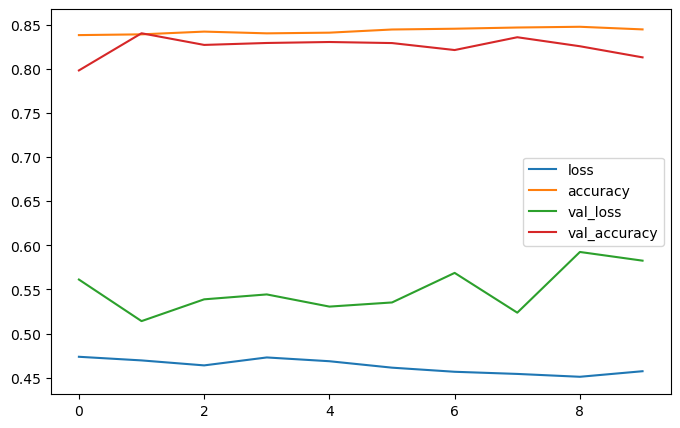

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [37]:
# history.history is a dictionary with keys 'loss', 'accuracy', 'val_loss', 'val_accuracy'
# what happens if we train model without validation data
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4541 - accuracy: 0.8450
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4531 - accuracy: 0.8452
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4516 - accuracy: 0.8481
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4571 - accuracy: 0.8454
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4504 - accuracy: 0.8479
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4535 - accuracy: 0.8479
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4473 - accuracy: 0.8486
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8496
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4468 - accuracy: 0.8511
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.449

313/313 [==============================] - 0s 1ms/step


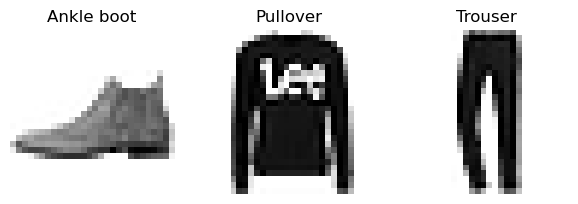

In [41]:
y_pred = model.predict(X_test)
y_pred[:3]
# the output is the probability of each class, we can use argmax to get the predicted class
y_pred = y_pred.argmax(axis=1)
y_pred[:3]

# we need corresponding class names to interpret the results
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_pred[0]]

#lets print the first 3 images
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)

In [42]:
# we can also use this for regression problems
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
import numpy as np


In [43]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=1)
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
norm_layer.adapt(np.array(X_train))
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8589 - val_loss: 0.4196
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4005 - val_loss: 0.3749
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3698 - val_loss: 0.3481
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3512 - val_loss: 0.3549
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3443 - val_loss: 0.3458
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3328 - val_loss: 0.3413
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3190 - val_loss: 0.3144
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3131 - val_loss: 0.3286
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3123 - val_loss: 0.3547
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3033 - val_loss: 0.3092

In [44]:
#lets build a wide and deep model
input = tf.keras.layers.Input(shape=X_train.shape[1:])
hidden1 = tf.keras.layers.Dense(30, activation='relu')(input)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.concatenate([input, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input], outputs=[output])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


# wide and deep model can be used for classification as well
# wide model is used to memorize patterns and deep model is used to generalize patterns



Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 413.8363 - val_loss: 4.1020
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 4.8385 - val_loss: 1.9496
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 2.4014 - val_loss: 1.7834
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 2.7717 - val_loss: 0.9345
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 1.0115 - val_loss: 0.9902
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4084 - val_loss: 0.8675
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 1.6872 - val_loss: 0.8475
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 1.5612 - val_loss: 5.2924
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 1.4116 - val_loss: 0.8668
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 4.5666 - val_loss: 47.3